In [1]:
import numpy as np
import pandas as pd
from fasttext import FastText

In [2]:
import seaborn as sns
from scipy.spatial import ConvexHull

In [3]:
ft_ru = FastText.load_model('cc.ru.300.bin')

In [4]:
import json
import io
import os

with io.open(os.path.join(os.getcwd(), 'data', 'habr-favorites.json'), encoding='utf-8') as fp:
    data_ru = json.load(fp)

In [5]:
len(data_ru)

4732

In [6]:
data_ru[0].keys()

dict_keys(['title', 'preview', 'article', 'tags', 'link', 'user'])

In [7]:
df_v = pd.DataFrame(data_ru)

In [8]:
df_v.head()

,title,preview,article,tags,link,user
0,Переписка со спамерами: избранное,"Конец XIV века, неизвестный автор: Комиссия ФА...","Конец XIV века, неизвестный автор: Комиссия ФА...",[Спам и антиспам],https://habr.com/ru/post/580906/,ne555
1,Геоаналитика с помощью Python и открытых данны...,"Геоаналитика с помощью Python: GeoPandas, foli...","Каждый бизнес желает знать, где сидит фазан це...","[Python *, OpenStreetMap *, Геоинформацион...",https://habr.com/ru/post/579838/,ne555
2,Умный дом в квартире,Пробую создать умный дом в квартире на програм...,Пробую создать умный дом в квартире на програм...,"[Разработка на Raspberry Pi *, Умный дом]",https://habr.com/ru/post/577382/,ne555
3,Ventoy. Мультизагрузочная флешка,"Мультизагрузочная флешка, сколько раз она меня...",Так выглядит загрузочный интерфейс Ventoy Утил...,[Софт],https://habr.com/ru/post/575642/,ne555
4,Упавшие с бомбами: аварии и катастрофы самолет...,"Ядерное оружие - это добро. Но только, когда о...",Ядерное оружие - это добро. Но только когда он...,"[Читальный зал, Научно-популярное, Энергия и э...",https://habr.com/ru/post/570344/,ne555


In [9]:
df_vector = []
for idx, row in df_v.iterrows():
    df_vector.append(ft_ru.get_word_vector(row.article))
df_vector = pd.DataFrame(df_vector)

In [10]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

In [117]:
vector2 = TSNE(n_components=2, perplexity=3).fit_transform(df_vector.values)

In [118]:
df_v['tsne_x'] = vector2[:, 0]
df_v['tsne_y'] = vector2[:, 1]

In [119]:
for c in ['x', 'y']:
    minc = df_v[f'tsne_{c}'].min()
    maxc = df_v[f'tsne_{c}'].max()
    df_v[f'{c}'] = (df_v[f'tsne_{c}'] - minc) / (maxc - minc)

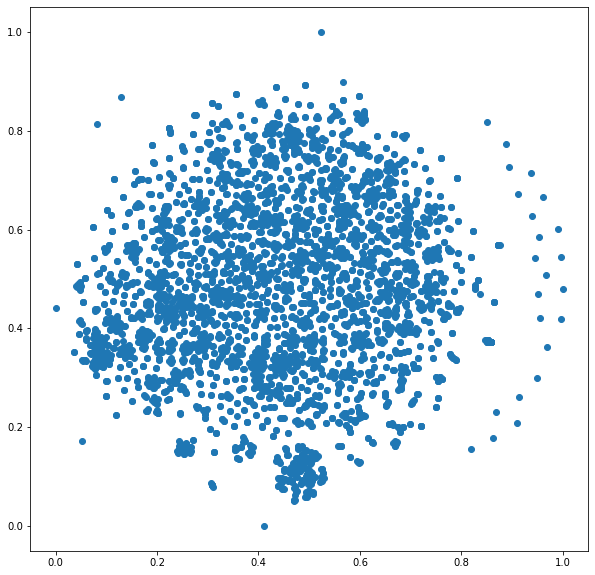

In [120]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

ax.scatter(df_v.x, df_v.y)
plt.show()

In [121]:
from sklearn.cluster import DBSCAN

In [122]:
clustering = DBSCAN(eps=0.01, min_samples=3).fit(df_v[['x', 'y']].values)

In [123]:
from collections import Counter
from operator import itemgetter

In [124]:
counter = Counter(clustering.labels_)
for cl, cnt in sorted(counter.items(), key=itemgetter(1), reverse=True):
    print(f'{cl}\t{cnt}')

-1	497
42	82
421	81
0	74
84	65
139	59
43	58
55	56
99	45
80	44
110	41
115	38
147	36
158	35
148	34
102	33
53	32
73	31
96	31
161	31
234	31
259	31
174	30
119	29
359	29
87	28
159	28
127	28
242	27
39	26
95	26
48	25
49	25
90	25
143	25
178	25
77	24
151	24
176	24
61	23
63	22
65	22
245	22
257	22
284	22
7	21
125	21
182	21
283	21
10	20
112	20
121	20
164	20
175	20
2	19
86	19
98	19
109	19
37	18
51	18
92	18
94	18
243	18
17	17
199	17
281	17
340	17
114	16
156	16
186	16
238	16
280	16
66	15
85	15
177	15
232	15
424	15
56	14
120	14
171	14
211	14
299	14
38	13
44	13
54	13
69	13
78	13
81	13
106	13
244	13
298	13
426	13
128	12
181	12
213	12
248	12
294	12
1	11
11	11
32	11
62	11
67	11
68	11
72	11
116	11
141	11
145	11
166	11
204	11
307	11
308	11
336	11
422	11
423	11
50	10
75	10
105	10
142	10
146	10
173	10
191	10
214	10
314	10
318	10
371	10
396	10
397	10
58	9
70	9
82	9
89	9
97	9
113	9
117	9
152	9
193	9
221	9
256	9
258	9
268	9
275	9
277	9
289	9
303	9
309	9
363	9
390	9
406	9
429	9
6	8
14	8
29	8
47	8
57	8
60	8
71	8
74

In [125]:
df_v['dbscan2'] = clustering.labels_

In [131]:
df_v[df_v.dbscan2 == 75]

,title,preview,article,tags,link,user,tsne_x,tsne_y,x,y,dbscan2
114,Microsoft добавила поддержку приложений Linux ...,"Тестировщики, работающие с ОС Windows, теперь ...","Тестировщики, работающие с ОС Windows, теперь ...","[Блог компании RUVDS.com, Системное администри...",https://habr.com/ru/company/ruvds/news/t/553768/,ntsaplin,-54.900692,38.286346,0.215092,0.646818,75
239,Windows 95 — как она выглядит сегодня?,Windows 95 была ОС Microsoft «следующего покол...,Windows 95 была ОС Microsoft «следующего покол...,"[Блог компании Маклауд, Виртуализация *, Ист...",https://habr.com/ru/company/macloud/blog/551050/,F0iL,-53.573261,38.297054,0.220622,0.646863,75
704,Установка Windows 7/8 на Mac без использования...,На многих компьютера Mac сегодня отсутствует о...,На многих компьютера Mac сегодня отсутствует о...,[Софт],https://habr.com/ru/post/148398/,IGHOR,-55.482231,34.785465,0.212670,0.631901,75
770,Руководство по созданию собственной установочн...,"Введение Сегодня я хочу рассказать о том, как ...","Введение Сегодня я хочу рассказать о том, как ...",[Системное администрирование *],https://habr.com/ru/post/181261/,IGHOR,-54.704250,35.553272,0.215910,0.635173,75
1199,Краткая история Windows и что у нее под капотом,Несколько дней назад в сеть просочился образ р...,Несколько дней назад в сеть просочился образ р...,"[Блог компании Маклауд, История IT, Софт]",https://habr.com/ru/company/macloud/blog/563726/,MagisterLudi,-54.581215,38.033859,0.216423,0.645742,75
1695,Почему Microsoft перестала бороться с пиратств...,"Microsoft — одна из немногих корпораций, основ...","Microsoft — одна из немногих корпораций, основ...","[Блог компании VDSina.ru, Информационная безоп...",https://habr.com/ru/company/vdsina/blog/543160/,pronskiy,-53.317623,38.723061,0.221687,0.648679,75
1965,Включение подсистемы Linux в Windows 10,Недавно мы опубликовали пост про новый билд Wi...,Недавно мы опубликовали пост про новый билд Wi...,[Блог компании ESET NOD32],https://habr.com/ru/company/eset/blog/281418/,radiolok,-55.008259,37.049419,0.214644,0.641548,75
2263,Бездисковая загрузка по технологии iSCSI на ба...,Написанию данного поста предшествовало сбор ин...,Написанию данного поста предшествовало сбор ин...,"[Системное администрирование *, Сетевые техн...",https://habr.com/ru/post/244661/,sukhe,-55.009205,34.934383,0.214640,0.632536,75
3193,Бесплатные VM с Windows для тестирования сайто...,Microsoft уже несколько лет раздаёт бесплатные...,Microsoft уже несколько лет раздаёт бесплатные...,"[Разработка веб-сайтов *, Internet Explorer]",https://habr.com/ru/post/158847/,zhovner,-54.217613,36.007427,0.217938,0.637108,75
3891,Выживание Windows XP x32 на современных ПК c п...,"Речь пойдет про платы периода 2016-2021+, т.е....","Речь пойдет про платы периода 2016-2021+, т.е....",[Настольные компьютеры],https://habr.com/ru/post/556930/,VT100,-53.323826,37.784397,0.221661,0.644679,75


In [127]:
clusters = df_v.dbscan2.unique()
n_clusters = len(clusters)

In [128]:
colors = sns.color_palette('husl', n_clusters)

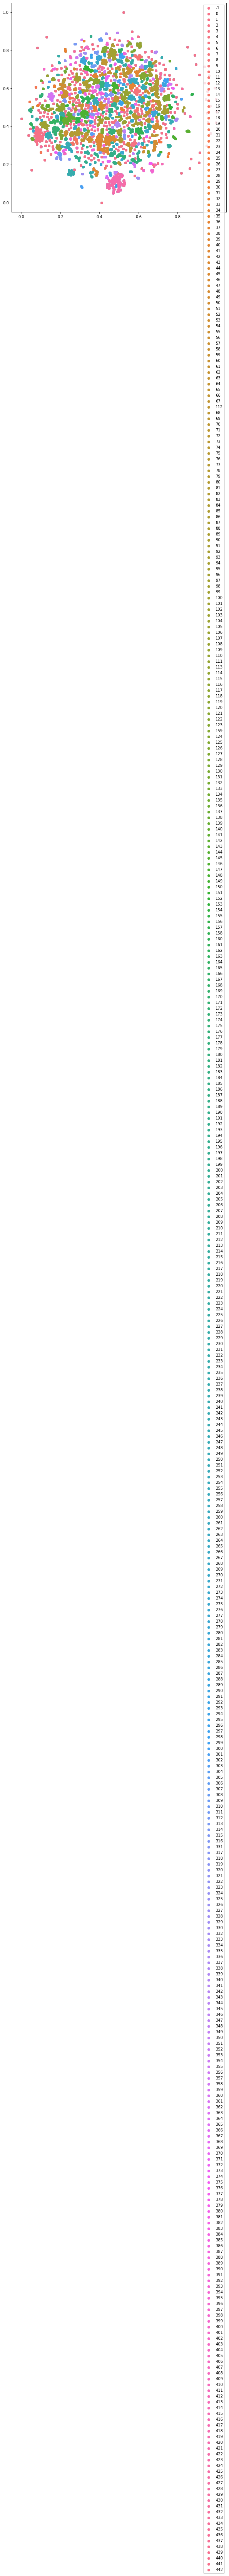

In [129]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

ax.scatter(df_v.x, df_v.y)

for i, cl in enumerate(clusters):
    idx = df_v[df_v['dbscan2'] == cl].index
    ax.scatter(df_v.loc[idx, 'x'], df_v.loc[idx, 'y'], color=colors[i], label=f'{cl}')

ax.legend()
plt.show()